# Kochi Cafe Project

#### The objective of this capstone project is to analyze and select the best locations in the city of Kochi, Kerala, India to open a new café. Using data science methodology and machine learning techniques like clustering, this project aims to provide solutions to answer the business question: In the city of Kochi, Kerala, India, if an entrepreneur is looking to open a new café, where would you recommend that they open it?   

**First we import all the modules**

In [202]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
!pip install geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### Import the data from wikipedia page to get Neighborhoods of Kochi

In [203]:
data = requests.get("https://en.wikipedia.org/wiki/Category:Suburbs_of_Kochi").text

In [204]:
soup = BeautifulSoup(data, 'html.parser')

In [205]:
# create a list to store neighborhood data
neighborhoodList = []

In [206]:

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

#### Adding one more Neighborhood

In [207]:
neighborhoodList.append("Kakkanad")

#### Creating Data Frame

In [208]:
kl_df = pd.DataFrame({"Neighborhood": neighborhoodList})

kl_df.head()

,Neighborhood
0,Alangad
1,Angamaly
2,Aroor
3,Chellanam
4,Chendamangalam


In [175]:
# print the number of rows of the dataframe
kl_df.shape

(45, 1)

#### Function to get coordinates

In [209]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Ernakulam, Kerala, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [210]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in kl_df["Neighborhood"].tolist() ]

In [211]:
coords

[[10.122220000000027, 76.31579000000005],
 [10.20366000000007, 76.38268000000005],
 [10.174710000000061, 76.31031000000007],
 [9.835260000000062, 76.27029000000005],
 [10.172920000000033, 76.23346000000004],
 [10.15354000000002, 76.34068000000008],
 [10.179920000000038, 76.47664000000003],
 [9.96118000000007, 76.30659000000009],
 [10.081320000000062, 76.34155000000004],
 [9.920160000000067, 76.38924000000003],
 [10.128150000000062, 76.37217000000004],
 [10.086410000000058, 76.38181000000003],
 [9.957580000000064, 76.24239000000006],
 [9.966870000000029, 76.35720000000003],
 [10.06352000000004, 76.24660000000006],
 [9.988452830057541, 76.30342643172278],
 [9.947600000000023, 76.26079000000004],
 [10.107690000000048, 76.26171000000005],
 [10.055610000000058, 76.27164000000005],
 [10.103150000000028, 76.24615000000006],
 [9.90220000000005, 76.31064000000003],
 [9.940510000000074, 76.32395000000008],
 [9.952060000000074, 76.25080000000008],
 [9.999140000000068, 76.26241000000005],
 [9.9307

In [212]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [213]:
# merge the coordinates into the original dataframe
kl_df['Latitude'] = df_coords['Latitude']
kl_df['Longitude'] = df_coords['Longitude']

In [181]:
# check the neighborhoods and the coordinates
print(kl_df.shape)
kl_df

(45, 3)


,Neighborhood,Latitude,Longitude
0,Alangad,10.122220,76.315790
1,Angamaly,10.203660,76.382680
2,Aroor,10.174710,76.310310
3,Chellanam,9.835260,76.270290
4,Chendamangalam,10.172920,76.233460
5,"Chengamanad, Ernakulam district",10.153540,76.340680
6,Cheranallur,10.179920,76.476640
7,Chilavannoor,9.961180,76.306590
8,Choornikkara,10.081320,76.341550
9,Chottanikkara,9.920160,76.389240


#### save the DataFrame as CSV file

In [214]:
# save the DataFrame as CSV file
kl_df.to_csv("kl_df.csv", index=False)

In [215]:
# get the coordinates of Kochi
address = 'Edapally, Kerala, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Edapally, Kerala, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edapally, Kerala, India 10.0250304, 76.3073744.


#### create map of the district using latitude and longitude values

In [216]:
map_kl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(kl_df['Latitude'], kl_df['Longitude'], kl_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kl)  
    
map_kl

In [217]:
# save the map as HTML file
map_kl.save('map_kl.html')

## Get FourSquare Credentials

In [218]:

# define Foursquare Credentials and Version
CLIENT_ID = 'U5K2KSNL1TWAUWYI01BISUVJNY0WYQXK3UZCM5ANATFTNPBC' # your Foursquare ID
CLIENT_SECRET = 'JULMAXF02HQ2OOURGR10AGPT0QIWSEON1RZUBOAWLPU5K0VK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: U5K2KSNL1TWAUWYI01BISUVJNY0WYQXK3UZCM5ANATFTNPBC
CLIENT_SECRET:JULMAXF02HQ2OOURGR10AGPT0QIWSEON1RZUBOAWLPU5K0VK


### create the API request URL

In [219]:
radius = 3000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(kl_df['Latitude'], kl_df['Longitude'], kl_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [220]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1351, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Alangad,10.12222,76.31579,@veliyathnadu rivers!,10.133890,76.323802,Bus Station
1,Alangad,10.12222,76.31579,Annalakshmi,10.122753,76.340661,Indian Restaurant
2,Alangad,10.12222,76.31579,"Desam, Aluva",10.129927,76.341062,Market
3,Alangad,10.12222,76.31579,Quality Bakers,10.119877,76.342730,Bakery
4,Angamaly,10.20366,76.38268,Carnival Cinemas,10.195147,76.386157,Multiplex


#### Count in each Venue Category

In [221]:
venues_df['VenueCategory'].value_counts()

Indian Restaurant                  178
Café                                93
Hotel                               88
Fast Food Restaurant                60
Bakery                              55
Restaurant                          51
Chinese Restaurant                  47
Vegetarian / Vegan Restaurant       44
Ice Cream Shop                      29
Asian Restaurant                    27
Clothing Store                      26
Shopping Mall                       25
Middle Eastern Restaurant           20
Burger Joint                        20
Park                                18
Pizza Place                         18
Hotel Bar                           18
Seafood Restaurant                  17
Fried Chicken Joint                 17
Juice Bar                           17
Coffee Shop                         16
Multiplex                           15
Department Store                    15
Bar                                 13
Boat or Ferry                       12
Electronics Store        

In [134]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Alangad,4,4,4,4,4,4
Angamaly,7,7,7,7,7,7
Aroor,1,1,1,1,1,1
Chellanam,1,1,1,1,1,1
Chendamangalam,5,5,5,5,5,5
"Chengamanad, Ernakulam district",9,9,9,9,9,9
Cheranallur,2,2,2,2,2,2
Chilavannoor,89,89,89,89,89,89
Choornikkara,5,5,5,5,5,5


In [222]:

print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 125 uniques categories.


In [223]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Bus Station', 'Indian Restaurant', 'Market', 'Bakery',
       'Multiplex', 'Train Station', 'Hotel', 'Restaurant',
       'Kerala Restaurant', 'Furniture / Home Store', 'Bar',
       'Fish Market', 'Asian Restaurant', 'Comfort Food Restaurant',
       'Fast Food Restaurant', 'Movie Theater', 'Café', 'Thai Restaurant',
       'French Restaurant', 'Stadium', 'Nightclub', 'Athletics & Sports',
       'Motorcycle Shop', 'Donut Shop', 'Ice Cream Shop',
       'Sandwich Place', 'Gastropub', 'Park', 'Gym / Fitness Center',
       'Chinese Restaurant', 'Pizza Place', 'Burger Joint', 'Art Gallery',
       'Seafood Restaurant', 'Middle Eastern Restaurant', 'Juice Bar',
       'Garden', 'Vegetarian / Vegan Restaurant', 'Resort',
       'Electronics Store', 'Multicuisine Indian Restaurant',
       'Jewelry Store', 'Coffee Shop', 'Diner', 'Liquor Store', 'Lounge',
       'Shopping Mall', 'Department Store', 'Soccer Stadium',
       'Dessert Shop'], dtype=object)

In [224]:
# check if the results contain "Café"
"Café" in venues_df['VenueCategory'].unique()

True

#### one hot encoding

In [225]:
# one hot encoding
kl_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kl_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]

print(kl_onehot.shape)
kl_onehot.head()


(1351, 126)


,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bakery,Bank,Bar,Beach,Boat or Ferry,Bookstore,Burger Joint,Bus Station,Cafeteria,Café,Cajun / Creole Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Event Service,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Food,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Golf Course,Gym,Gym / Fitness Center,Harbor / Marina,Hill,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Neighborhood,Nightclub,Park,Performing Arts Venue,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Punjabi Restaurant,Recreation Center,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Water Park,Wine Shop
0,Alangad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alangad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alangad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alangad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Angamaly,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [226]:
kl_grouped = kl_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(kl_grouped.shape)
kl_grouped

(45, 126)


,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bakery,Bank,Bar,Beach,Boat or Ferry,Bookstore,Burger Joint,Bus Station,Cafeteria,Café,Cajun / Creole Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Event Service,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Food,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Golf Course,Gym,Gym / Fitness Center,Harbor / Marina,Hill,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Neighborhood,Nightclub,Park,Performing Arts Venue,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Punjabi Restaurant,Recreation Center,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Water Park,Wine Shop
0,Alangad,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
1,Angamaly,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.142857,0.000000,0.00,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.142857,0.000000,0.000000,0.00,0.000000
2,Aroor,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00

#### No: of Groups

In [227]:
len(kl_grouped[kl_grouped["Café"] > 0])

16

In [228]:
kl_caf = kl_grouped[["Neighborhoods","Café"]]

### KMEANS Clustering Implementation

In [230]:
# set number of clusters
kclusters = 3

kl_clustering = kl_caf.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

#### create a new dataframe

In [232]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
kl_merged = kl_caf.copy()

# add clustering labels
kl_merged["Cluster Labels"] = kmeans.labels_

In [234]:

kl_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
kl_merged.head()

,Neighborhood,Café,Cluster Labels
0,Alangad,0.0,1
1,Angamaly,0.0,1
2,Aroor,0.0,1
3,Chellanam,0.0,1
4,Chendamangalam,0.0,1


In [235]:
kl_merged = kl_merged.join(kl_df.set_index("Neighborhood"), on="Neighborhood")

print(kl_merged.shape)
kl_merged.head() # check the last columns!

(45, 5)


,Neighborhood,Café,Cluster Labels,Latitude,Longitude
0,Alangad,0.0,1,10.12222,76.31579
1,Angamaly,0.0,1,10.20366,76.38268
2,Aroor,0.0,1,10.17471,76.31031
3,Chellanam,0.0,1,9.83526,76.27029
4,Chendamangalam,0.0,1,10.17292,76.23346


### results sorted by Cluster Labels

In [236]:
# sort the results by Cluster Labels
print(kl_merged.shape)
kl_merged.sort_values(["Cluster Labels"], inplace=True)
kl_merged

(45, 5)


,Neighborhood,Café,Cluster Labels,Latitude,Longitude
44,Willingdon Island,0.098765,0,9.944160,76.283560
17,Kochangadi,0.098039,0,9.947600,76.260790
16,Karanakodam,0.113636,0,9.988453,76.303426
15,Kakkanad,0.113208,0,10.016870,76.345360
25,Mundamveli,0.090909,0,9.930700,76.253200
26,Nedumbassery,0.120000,0,10.156690,76.377800
12,Fort Kochi,0.097561,0,9.957580,76.242390
23,Mattancherry,0.095238,0,9.952060,76.250800
28,Pachalam,0.130952,0,10.003470,76.281220
31,Thammanam,0.100000,0,9.985570,76.311300


### Creating Map

In [237]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['Neighborhood'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [238]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

### Cluster Labels- 0 Contains More number of Cafe (Red in color)

In [239]:
kl_merged.loc[kl_merged['Cluster Labels'] == 0]

,Neighborhood,Café,Cluster Labels,Latitude,Longitude
44,Willingdon Island,0.098765,0,9.944160,76.283560
17,Kochangadi,0.098039,0,9.947600,76.260790
16,Karanakodam,0.113636,0,9.988453,76.303426
15,Kakkanad,0.113208,0,10.016870,76.345360
25,Mundamveli,0.090909,0,9.930700,76.253200
26,Nedumbassery,0.120000,0,10.156690,76.377800
12,Fort Kochi,0.097561,0,9.957580,76.242390
23,Mattancherry,0.095238,0,9.952060,76.250800
28,Pachalam,0.130952,0,10.003470,76.281220
31,Thammanam,0.100000,0,9.985570,76.311300


### Cluster Labels- 1 Contains very less number/No of Cafe (Violet in color)

In [240]:
kl_merged.loc[kl_merged['Cluster Labels'] == 1]

,Neighborhood,Café,Cluster Labels,Latitude,Longitude
29,Palluruthy,0.0,1,9.91642,76.27567
27,Nettoor,0.0,1,9.92726,76.31181
33,Thiruvankulam,0.0,1,9.94635,76.36746
36,Thrippunithura,0.0,1,9.94111,76.34698
37,Twenty20 Kizhakkambalam,0.0,1,10.04626,76.40411
38,Vaduthala,0.0,1,10.01825,76.27586
39,Vallarpadam,0.0,1,9.99789,76.24981
40,Varappuzha,0.0,1,10.08261,76.27041
24,Mulavukad,0.0,1,9.99914,76.26241
30,Pathalam,0.0,1,10.07817,76.31857


### Cluster Labels- 2 Contains moderate number of Cafe (Blue in color)

In [241]:
kl_merged.loc[kl_merged['Cluster Labels'] == 2]

,Neighborhood,Café,Cluster Labels,Latitude,Longitude
7,Chilavannoor,0.067416,2,9.96118,76.30659
32,Thevara,0.041667,2,9.94209,76.29839
34,Thrikkakkara,0.070000,2,10.01736,76.31637
35,Thrikkakkara South,0.046512,2,10.03324,76.32519
41,Vazhakkala,0.060000,2,10.01783,76.32908
42,Vennala,0.070588,2,9.99538,76.32243


### Scatter plot of the Data

In [273]:
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits import mplot3d


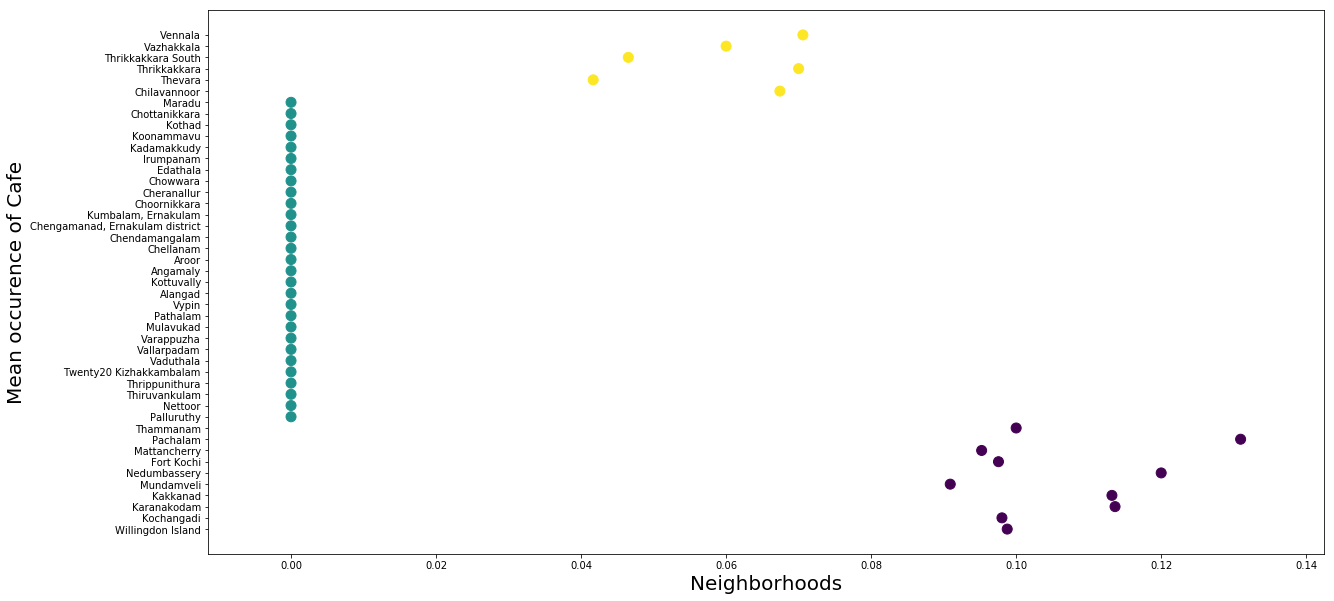

In [282]:
plt.figure(figsize=(20,10))
plt.scatter(kl_merged.loc[:,'Café'],kl_merged.loc[:,'Neighborhood'],s=100,c=kl_merged['Cluster Labels'].astype(float))
plt.xlabel("Neighborhoods",fontsize=20)
plt.ylabel("Mean occurence of Cafe",fontsize=20)
plt.show()